# Loading the Datasets

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = r"D:/PES/Code_Monk_Assignment/archive/fashion-dataset/fashion-dataset/styles.csv"

style_df = pd.read_csv(csv_file_path, on_bad_lines="skip")
print("CSV file loaded successfully!")

CSV file loaded successfully!


# Checking and Handling null values

In [20]:
print(style_df.isnull().sum())

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


In [21]:
style_df.dropna(inplace=True)

In [22]:
print(style_df.isnull().sum())

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64


# Visualizing Distribution of Categorical Variables or Features

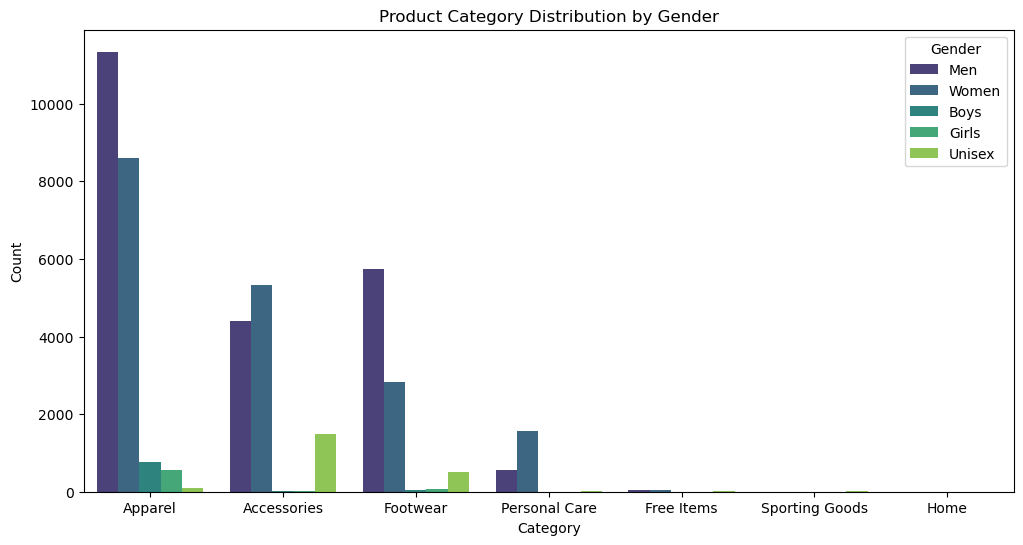

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=style_df, x="masterCategory", hue="gender", palette="viridis")
plt.title("Product Category Distribution by Gender")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

# insights => this means that mens are more interested in clothing/apparel and footwear as many people plays various sports in summmer and womens in Personal Care and Accessories as winter they is risk of skin damage for girls

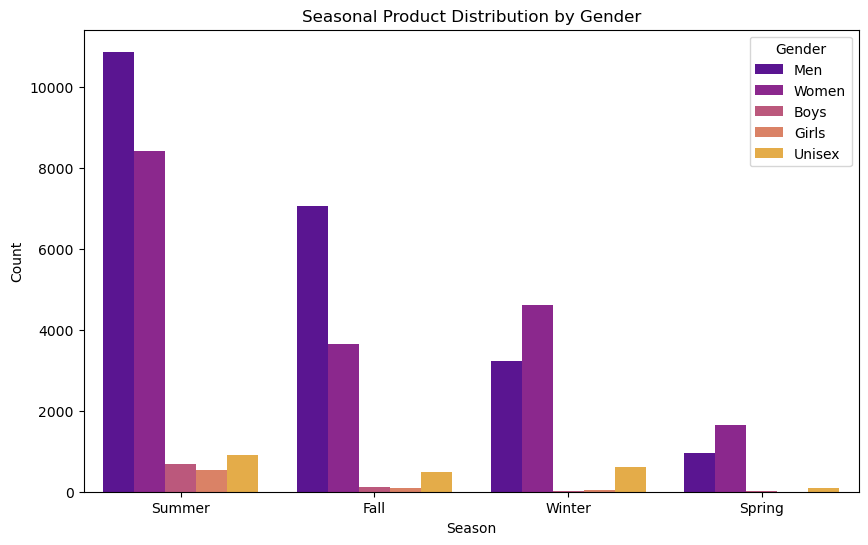

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=style_df, x='season', hue='gender', palette='plasma', order=style_df['season'].value_counts().index)
plt.title('Seasonal Product Distribution by Gender')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# insights => this conveys us strong dominance of mens in summer and fall(categories such as Apparel and Footwear) season followed by womens with strong dominance in winter and spring season(Personal care and Accessories) 

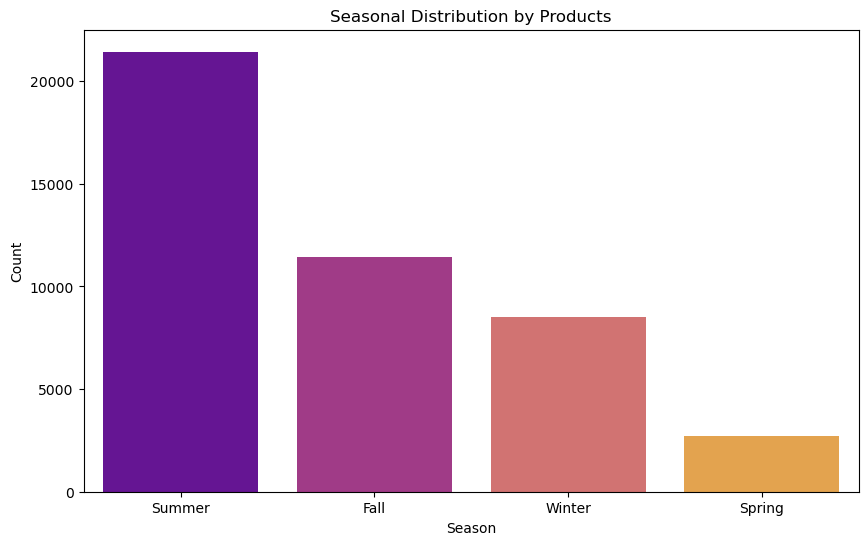

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=style_df, x='season', palette='plasma', order=style_df['season'].value_counts().index)
plt.title('Seasonal Distribution by Products')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# insights => it conveys that summer is the most loved season for customers of all genders to buys various products.

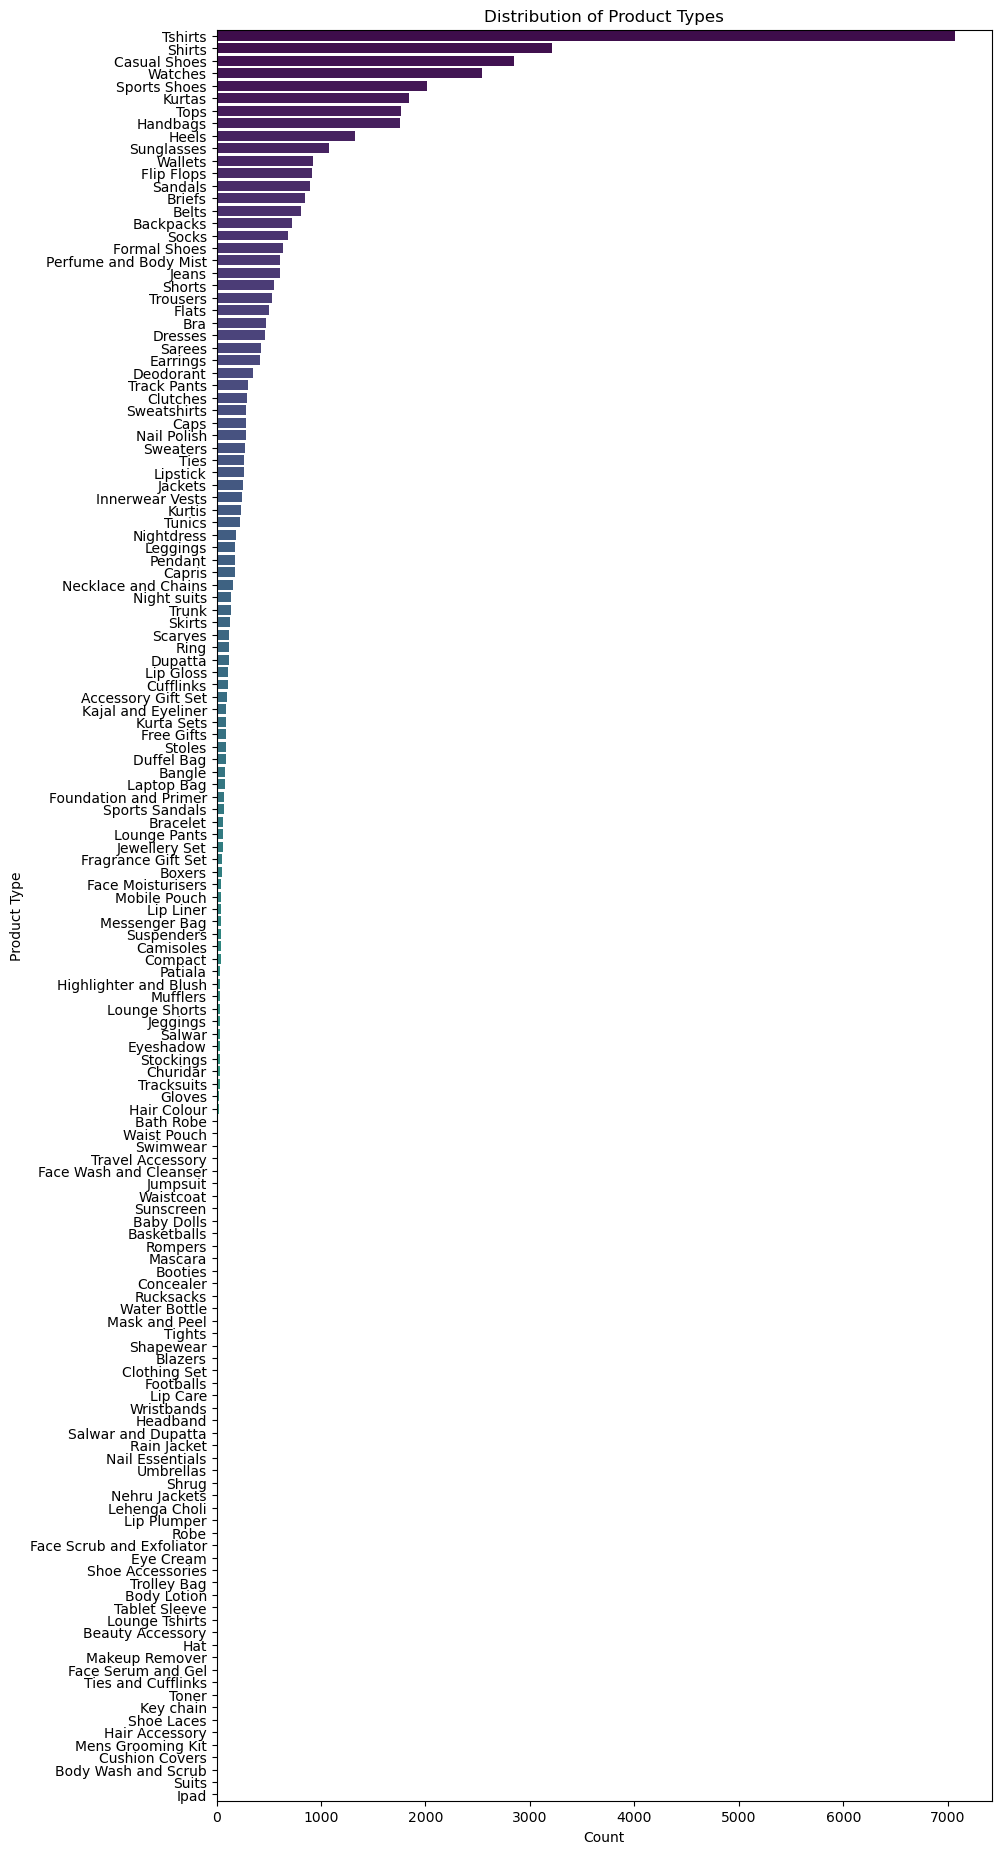

In [ ]:
plt.figure(figsize=(10, 23))
sns.countplot(data=style_df, y='articleType', palette='viridis', order=style_df['articleType'].value_counts().index)
plt.title('Distribution of Product Types')
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

# insights => this means that tshirts are more loved as compared to other product types and also after tshirt next product is shirt which indicates strong buying of this product in almost all the seasons

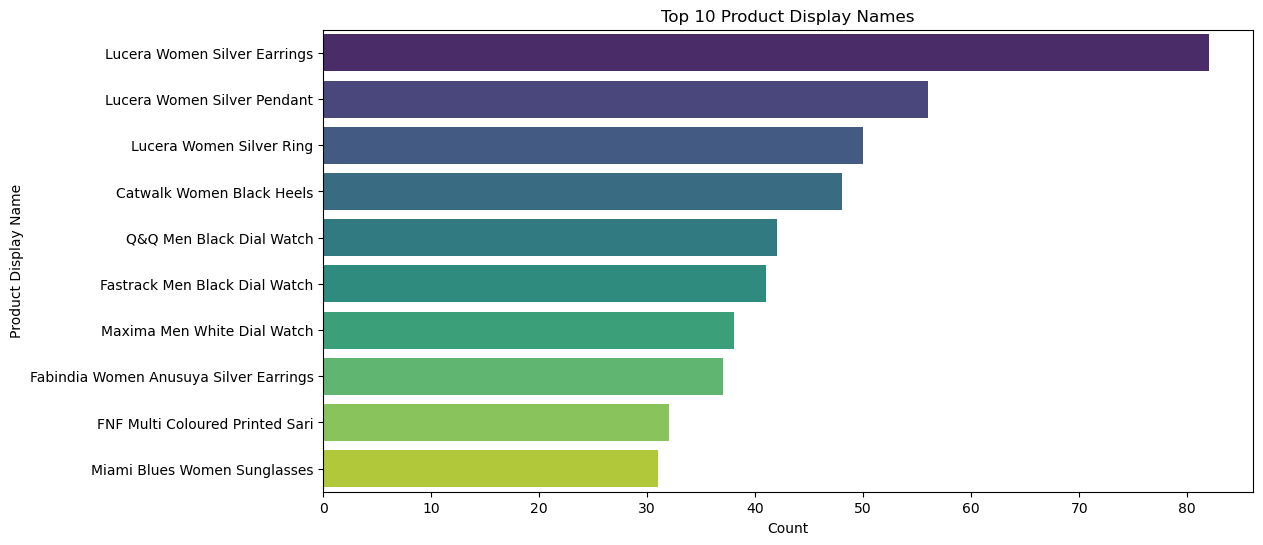

In [ ]:
plt.figure(figsize=(12, 6))
top_10_products = style_df['productDisplayName'].value_counts().nlargest(10).index
sns.countplot(data=style_df[style_df['productDisplayName'].isin(top_10_products)], y='productDisplayName', palette='viridis', order=top_10_products)
plt.title('Top 10 Product Display Names')
plt.xlabel('Count')
plt.ylabel('Product Display Name')
plt.show()

# insights => The insight from this graph is that women's jewelry (especially Lucera brand) and men's watches dominate the top 10 products

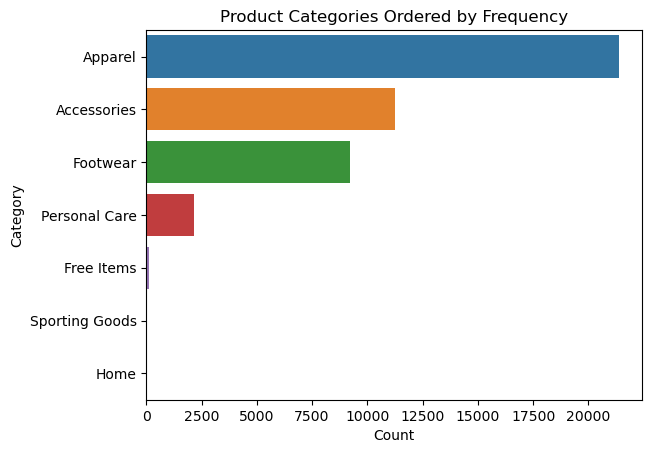

In [ ]:
sns.countplot(data=style_df, y='masterCategory', order=style_df['masterCategory'].value_counts().index)
plt.title('Product Categories Ordered by Frequency')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# insights => out of all the products categories Apparels are loved which means that its high chances that almost all the genders loves products under this category.

# Visualizing the Distribution of Numerical Variables or Features

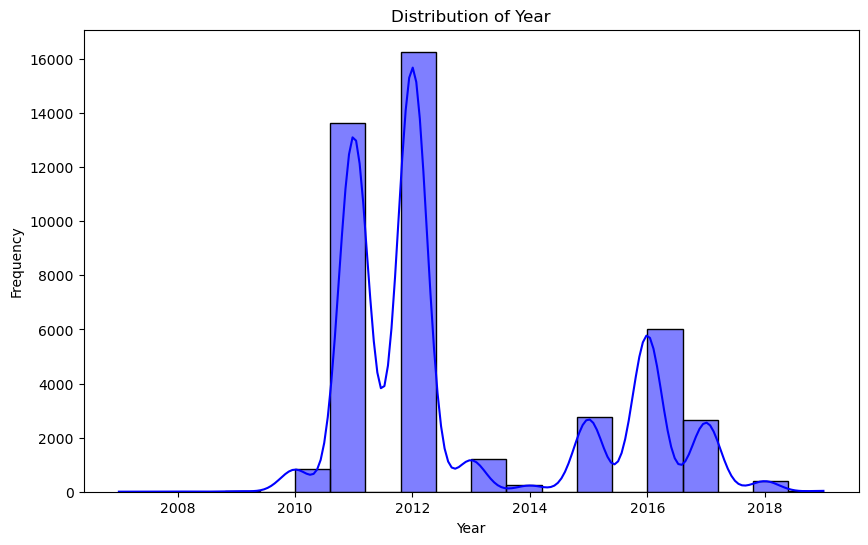

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=style_df, x='year', bins=20, kde=True, color='blue')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# insights => The graph conveys that the dataset is heavily skewed towards recent years (2016–2018), indicating a significant increase in data points over time, with minimal or no representation for earlier years (2008–2010), suggesting a focus on modern trends or records.

# Applying LabelEncoder() on the Categorical columns/features

In [31]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ["baseColour", "articleType", "season", "gender"]

encoders = {column: LabelEncoder() for column in categorical_columns}

for column in categorical_columns:
    style_df[column] = encoders[column].fit_transform(style_df[column])
    
style_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,2,Apparel,Topwear,103,25,0,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,2,Apparel,Bottomwear,56,2,2,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,4,Accessories,Watches,139,37,3,2016.0,Casual,Titan Women Silver Watch
3,21379,2,Apparel,Bottomwear,127,1,0,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,2,Apparel,Topwear,133,13,2,2012.0,Casual,Puma Men Grey T-shirt


# Load Dataset and DataLoader

In [16]:
style_df["id"] = style_df["id"].astype(str)

image_folder_path = r"D:/PES/Code_Monk_Assignment/archive/fashion-dataset/fashion-dataset/images"

valid_rows = []
for idx, row in style_df.iterrows():
    img_filename = row["id"] + ".jpg"
    img_path = os.path.join(image_folder_path, img_filename)
    if os.path.exists(img_path):
        row["filename"] = img_filename
        valid_rows.append(row)
    else:
        print(f"Image not found: {img_path}")

valid_df = pd.DataFrame(valid_rows)
print(f"Total valid samples: {len(valid_df)}")

if len(valid_df) == 0:
    raise ValueError("No valid images found. Please check the image paths and filenames.")

img_size = (224, 224)
batch_size = 32

data_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2
)

train_generator = data_gen.flow_from_dataframe(
    dataframe=valid_df,
    directory=image_folder_path,
    x_col="filename",
    y_col=categorical_columns,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="multi_output",
    subset="training"
)

val_generator = data_gen.flow_from_dataframe(
    dataframe=valid_df,
    directory=image_folder_path,
    x_col="filename",
    y_col=categorical_columns,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="multi_output",
    subset="validation"
)

if train_generator.samples == 0 or val_generator.samples == 0:
    raise ValueError("No images found in the generators. Please check the paths and filenames.")

Image not found: D:/PES/Code_Monk_Assignment/archive/fashion-dataset/fashion-dataset/images\39403.jpg
Image not found: D:/PES/Code_Monk_Assignment/archive/fashion-dataset/fashion-dataset/images\39410.jpg
Image not found: D:/PES/Code_Monk_Assignment/archive/fashion-dataset/fashion-dataset/images\39401.jpg
Image not found: D:/PES/Code_Monk_Assignment/archive/fashion-dataset/fashion-dataset/images\39425.jpg
Image not found: D:/PES/Code_Monk_Assignment/archive/fashion-dataset/fashion-dataset/images\12347.jpg
Total valid samples: 44072
Found 35258 validated image filenames.
Found 8814 validated image filenames.


# Define Model

In [17]:
def build_model(num_colors, num_types, num_seasons, num_genders):
    input_layer = layers.Input(shape=(224, 224, 3))

    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation="relu")(x)

    color_output = layers.Dense(num_colors, activation="softmax", name="color")(x)
    type_output = layers.Dense(num_types, activation="softmax", name="type")(x)
    season_output = layers.Dense(num_seasons, activation="softmax", name="season")(x)
    gender_output = layers.Dense(num_genders, activation="softmax", name="gender")(x)
    
    model = models.Model(inputs=input_layer, outputs=[color_output, type_output, season_output, gender_output])
    return model

num_colors = len(encoders["baseColour"].classes_)
num_types = len(encoders["articleType"].classes_)
num_seasons = len(encoders["season"].classes_)
num_genders = len(encoders["gender"].classes_)

# Train and Compile Model

In [21]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss={
        "color": "sparse_categorical_crossentropy",
        "type": "sparse_categorical_crossentropy",
        "season": "sparse_categorical_crossentropy",
        "gender": "sparse_categorical_crossentropy"
    },
    metrics=["accuracy"]
)

model.summary()

epochs = 1
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)

model.save("fashion_cnn_model_tensorflow.h5")
print("Model saved successfully!")

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 224, 224, 32)         896       ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)         0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 112, 112, 64)         18496     ['max_pooling2d_3[0][0]'

In [ ]:
import pickle

# Save the encoders
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)